# 1. Numpy Array

Numpy array has its own "axis" system.

![](http://www.johncanessa.com/wp-content/uploads/2019/02/numpy_broadcasting-300x168.png)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('default')

# 1-1. Array

In [2]:
arr1 = np.array([1, 2, 3.])
print(arr1)
print(type(arr1))
print(arr1.dtype)

[1. 2. 3.]
<class 'numpy.ndarray'>
float64


In [3]:
print(arr1.shape)
print(arr1.size)
print(arr1.ndim)

(3,)
3
1


In [4]:
arr2 = np.array([[1, 2, 3], [4, 5, 6]])
print(arr2)
print(type(arr2))
print(arr2.dtype)

[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>
int64


* **NOTE**: On Windows machine, you may see ``int32`` rather than ``int64``. I don't know the reason but think it's better to mention it :)

In [5]:
print(arr2.shape)
print(arr2.size)
print(arr2.ndim)

(2, 3)
6
2


## 1-2. Array Generation 

### 1-2-1. ``arange``

* [``arange``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html): ``np.arange([start, ]stop, [step, ]dtype=None)``

In [6]:
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


In [7]:
print(np.arange(10.))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [8]:
print(np.arange(10, 100, 5))

[10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


In [9]:
print(np.arange(10, 100, 25, dtype='float'))

[10. 35. 60. 85.]


In [10]:
print(np.arange(10, 100, 25, dtype=np.float128))

[10. 35. 60. 85.]


In [11]:
print(np.arange(10, 100, 25, dtype='float32'))

[10. 35. 60. 85.]


**CAVEAT for ``arange``**

Numerical precision issue gives this problem (see [this issue](https://github.com/numpy/numpy/issues/11913)):

In [12]:
np.arange(1, 1.6, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6])

### 1-2-2. ``linspace``
* [``linspace``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html): ``np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)``

In [13]:
np.linspace(0, 10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

### 1-2-3. ``logspace``
* [``logspace``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html): ``np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)``

In [14]:
np.logspace(0, 2)

array([  1.        ,   1.09854114,   1.20679264,   1.32571137,
         1.45634848,   1.59985872,   1.75751062,   1.93069773,
         2.12095089,   2.32995181,   2.55954792,   2.8117687 ,
         3.0888436 ,   3.39322177,   3.72759372,   4.09491506,
         4.49843267,   4.94171336,   5.42867544,   5.96362332,
         6.55128557,   7.19685673,   7.90604321,   8.68511374,
         9.54095476,  10.48113134,  11.51395399,  12.64855217,
        13.89495494,  15.26417967,  16.76832937,  18.42069969,
        20.23589648,  22.22996483,  24.42053095,  26.82695795,
        29.47051703,  32.37457543,  35.56480306,  39.06939937,
        42.9193426 ,  47.14866363,  51.79474679,  56.89866029,
        62.50551925,  68.6648845 ,  75.43120063,  82.86427729,
        91.0298178 , 100.        ])

Identical to ``10**(np.logspace(0, 2))``:

In [15]:
np.testing.assert_allclose(np.logspace(0, 2), 10**(np.linspace(0, 2)))

## 1-3. More About Array Generation

### 1-3-1. Random Number

For random number generation, we need the initial "starting point" to make a series of "random number".

If other person used identical seed value, they'll reproduce your "random number" result. One of my friends said "random number is so fun; it's random but not random."

In [16]:
np.random.seed(12345)

In [17]:
arr_norm_1d = np.random.normal(loc=0, scale=1, size=5)
print(arr_norm_1d)

[-0.20470766  0.47894334 -0.51943872 -0.5557303   1.96578057]


In [18]:
arr_norm_2d = np.random.normal(loc=0, scale=1, size=(5, 5))
print(arr_norm_2d)

[[ 1.39340583e+00  9.29078767e-02  2.81746153e-01  7.69022568e-01
   1.24643474e+00]
 [ 1.00718936e+00 -1.29622111e+00  2.74991633e-01  2.28912879e-01
   1.35291684e+00]
 [ 8.86429341e-01 -2.00163731e+00 -3.71842537e-01  1.66902531e+00
  -4.38569736e-01]
 [-5.39741446e-01  4.76985010e-01  3.24894392e+00 -1.02122752e+00
  -5.77087303e-01]
 [ 1.24121276e-01  3.02613562e-01  5.23772068e-01  9.40277775e-04
   1.34380979e+00]]


Check whether it's really normally distributed when sampled many:

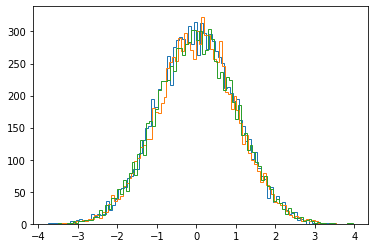

In [19]:
for i in range(3):
    arr_norm_1d = np.random.normal(size=10000)
    _ = plt.hist(arr_norm_1d, 100, histtype='step')

* **NOTE**: See what happens if you just run the code below
```python
arr_norm_1d = np.random.normal(size=10000)
plt.hist(arr_norm_1d, 100, histtype='step')
```
Now maybe you understand why I needed ``_ = `` in front of the ``plt.hist``

Many other distributions ([here](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html)). But mostly you will use ``normal`` and ``rand``.

### 1-3-2. Reshaping

In [20]:
arr_orig = np.arange(10)
arr_resh = arr_orig.reshape(2, 5)
print("original\n", arr_orig)
print("\nreshaped\n", arr_resh)
print("\nreshaped's shape\n", arr_resh.shape)

original
 [0 1 2 3 4 5 6 7 8 9]

reshaped
 [[0 1 2 3 4]
 [5 6 7 8 9]]

reshaped's shape
 (2, 5)


### 1-3-3. One, Zero, Empty, and Identity

In [21]:
reference = np.arange(9).reshape(3, 3)
ones = np.ones((3, 3))
zeros = np.zeros((3, 3))
emptys = np.empty((3, 3))
identity = np.eye(3)

print("Ones\n", ones)
print("\nZeros\n", zeros)
print("\nEmpty\n", emptys)
print("\nIdentity\n", identity)

Ones
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Zeros
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Empty
 [[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]

Identity
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


``np.empty`` is not recommended (I couldn't have found when it's really necessary to use against zeros or ones), because it sometimes fills all element with **garbage** values like ``1.5e-323`` or ``1``.

Another usage is ``xxxx_like``:

In [22]:
reference = np.arange(9).reshape(3, 3)
ones_like = np.ones_like(reference)
# np.ones(reference.shape)
zeros_like = np.zeros_like(reference)
emptys_like = np.empty_like((3, 3))

print("Ones_like\n", ones)
print("\nZeros_like\n", zeros)
print("\nEmpty_like\n", emptys)

Ones_like
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Zeros_like
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Empty_like
 [[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]


## 1-4. Array Indexing
Similar to usual python

In [23]:
a1 = np.arange(10).reshape(2, 5)
print(a1[0]) # equivalent to a1[0, :], NOT a1[:, 0]
print(a1[0, :])

[0 1 2 3 4]
[0 1 2 3 4]


In [24]:
print(a1[0, 1:3])
print(a1[0, ::2])

[1 2]
[0 2 4]


In [25]:
print(a1[-1, :])

[5 6 7 8 9]


In [26]:
a1[0, 0] = -111
print(a1)

[[-111    1    2    3    4]
 [   5    6    7    8    9]]


In [27]:
print("a1[::-1]")
print(a1[::-1])
print("\na1[:, ::-1]")
print(a1[:, ::-1])

a1[::-1]
[[   5    6    7    8    9]
 [-111    1    2    3    4]]

a1[:, ::-1]
[[   4    3    2    1 -111]
 [   9    8    7    6    5]]


In [28]:
# N-D to 1-D
print(a1.flatten())

[-111    1    2    3    4    5    6    7    8    9]


**When to use ``flatten()``?**

An example is, when you have a lot of N-D data (e.g., 1000 x 1000 = 1,000,000 pixel image) but want just one single histogram (pixel value histogram).

If you do not use ``flatten()``, it will take a lot of time and give strange results.

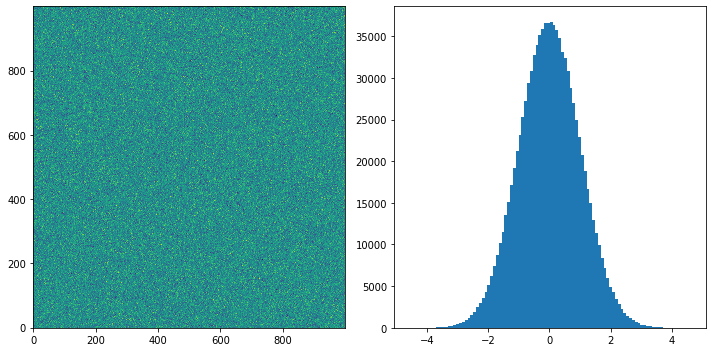

In [29]:
np.random.seed(123)

# Random number sampling from the standard normal distribution
data = np.random.normal(size=(1000, 1000))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(data, origin='lower', aspect='auto')
_ = axs[1].hist(data.flatten(), bins=100)

plt.tight_layout()
plt.show()

## 1-5. Concatenation

In [30]:
a = np.arange(10)
b = np.linspace(20, 11, num=10)

In [31]:
print(a, b)

[0 1 2 3 4 5 6 7 8 9] [20. 19. 18. 17. 16. 15. 14. 13. 12. 11.]


In [32]:
print("concatenate")
print(np.concatenate([a, b]))
print("\nhstack")
print(np.hstack([a, b]))
print("\nvstack")
print(np.vstack([a, b]))

concatenate
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 20. 19. 18. 17. 16. 15. 14. 13.
 12. 11.]

hstack
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 20. 19. 18. 17. 16. 15. 14. 13.
 12. 11.]

vstack
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [20. 19. 18. 17. 16. 15. 14. 13. 12. 11.]]


You can use ``axis`` option for ``concatenate``, but it may give ``AxisError`` if you do ``axis=1`` above to mimic ``vstack`` results. 

# 2. Array Arithmetics

In [33]:
ref1 = np.arange(20).reshape(5, 4)
ref2 = np.arange(-19, 1).reshape(5, 4)

In [34]:
print(ref1)
print(ref2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[-19 -18 -17 -16]
 [-15 -14 -13 -12]
 [-11 -10  -9  -8]
 [ -7  -6  -5  -4]
 [ -3  -2  -1   0]]


## 2-1. Basic Arithmetics

In [35]:
print(2*ref1)
print(ref1**2)

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]
 [24 26 28 30]
 [32 34 36 38]]
[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]
 [144 169 196 225]
 [256 289 324 361]]


In [36]:
print(ref1 + ref2)

[[-19 -17 -15 -13]
 [-11  -9  -7  -5]
 [ -3  -1   1   3]
 [  5   7   9  11]
 [ 13  15  17  19]]


In [37]:
print(ref1 * ref2)

[[  0 -18 -34 -48]
 [-60 -70 -78 -84]
 [-88 -90 -90 -88]
 [-84 -78 -70 -60]
 [-48 -34 -18   0]]


In [38]:
zero_div = ref1/ref2
print(zero_div)

[[ -0.          -0.05555556  -0.11764706  -0.1875    ]
 [ -0.26666667  -0.35714286  -0.46153846  -0.58333333]
 [ -0.72727273  -0.9         -1.11111111  -1.375     ]
 [ -1.71428571  -2.16666667  -2.8         -3.75      ]
 [ -5.33333333  -8.5        -18.                  inf]]


/Users/ysbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


Matrix multiplication by ``@``

In [39]:
print(ref1@ref2.T)  # Transpose

[[ -100   -76   -52   -28    -4]
 [ -380  -292  -204  -116   -28]
 [ -660  -508  -356  -204   -52]
 [ -940  -724  -508  -292   -76]
 [-1220  -940  -660  -380  -100]]


* **NOTE**: See what happens if you don't do ``.T`` to ``ref2``.

## 2-2 NaN and inf
NaN (Not a Number) and inf (infinity) are two important and useful concepts in all numpy-related packages. When you do ``1 / 0``, it should give "Error", and all your program just break down. In numpy, ``nan`` is used, so all the calculations are done correctly except it gives ``nan`` when there is any of those. This is useful because the code runs as expected (no need to struggle with avoiding Errors) and you can remove any results which contains ``nan`` at the final stage.

In [40]:
np.isinf(zero_div)

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True]])

In [41]:
np.isnan(np.log(-1))

/Users/ysbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


True

In [42]:
npnan = np.nan
npinf = np.inf
isinf = (zero_div == np.inf)  # same as np.isinf(~~)
isnan = (zero_div == np.nan)  # same as np.isnan(~~)
print(isinf)
print(isnan)

[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False  True]]
[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]


To quickly chech how many nan or inf happened:

In [43]:
print(np.count_nonzero(np.isinf(zero_div)))

1


## 2-3. Axis Operation

If you use numpy without utilizing axis, you are doing something wrong.

In [44]:
print("Original\n", ref1)
print("\nSum all\n", ref1.sum())
print("\nSum axis0\n", ref1.sum(axis=0))
print("\nSum axis1\n", ref1.sum(axis=1))

Original
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]

Sum all
 190

Sum axis0
 [40 45 50 55]

Sum axis1
 [ 6 22 38 54 70]


Many more: ``.min()``, ``.max()``, ``.mean()``...

Better way is to use ``np.min()``, etc:

In [45]:
print("Mean axis1", np.mean(ref1, axis=1))
print("Median axis1", np.median(ref1, axis=1))
print("Sample std axis1", np.std(ref1, axis=1, ddof=1))

Mean axis1 [ 1.5  5.5  9.5 13.5 17.5]
Median axis1 [ 1.5  5.5  9.5 13.5 17.5]
Sample std axis1 [1.29099445 1.29099445 1.29099445 1.29099445 1.29099445]


## 3. Masking

## 3-1. Basic Masking

In [46]:
np.random.seed(123)
a = np.random.normal(size=(5, 4))
b = np.random.normal(size=(5, 4))
print(a)

[[-1.0856306   0.99734545  0.2829785  -1.50629471]
 [-0.57860025  1.65143654 -2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404  -0.67888615 -0.09470897]
 [ 1.49138963 -0.638902   -0.44398196 -0.43435128]
 [ 2.20593008  2.18678609  1.0040539   0.3861864 ]]


NOTE: You should not erase any of the parentheses below:

In [47]:
m_a = ((-1 < a)
       & (a < 1))
# For "or", you can use ``|`` (called pipe. Hit "shift + \")
in1sig = np.count_nonzero(m_a)
in1sig_ratio = in1sig / a.size

print("Mask\n", m_a)
print("\nMasked values\n", a[m_a])
print("\nIn 1-sigma ratio\n", in1sig_ratio)

Mask
 [[False  True  True False]
 [ True False False  True]
 [False  True  True  True]
 [False  True  True  True]
 [False False False  True]]

Masked values
 [ 0.99734545  0.2829785  -0.57860025 -0.42891263 -0.8667404  -0.67888615
 -0.09470897 -0.638902   -0.44398196 -0.43435128  0.3861864 ]

In 1-sigma ratio
 0.55


Statistically, 68.xx % should be in 1-sigma range. We have only 20 samples, so it's a small-number statistics, and may significanlty differ from 68%.

In [48]:
data_quality = np.ones_like(b).astype(bool)
data_quality[2, 1:3] = False
data_quality

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True, False, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## 3-2. Advanced Masking

If you just do ``b[data_quality]``, the dimension will be reduced to 1-D, which makes it difficult to operate (e.g., average) with ``a``. Then, we replace these with ``nan``:

In [49]:
b_nan = b.copy()
b_nan[~data_quality] = np.nan
b_nan

array([[ 0.73736858,  1.49073203, -0.93583387,  1.17582904],
       [-1.25388067, -0.6377515 ,  0.9071052 , -1.4286807 ],
       [-0.14006872,         nan,         nan, -2.79858911],
       [-1.7715331 , -0.69987723,  0.92746243, -0.17363568],
       [ 0.00284592,  0.68822271, -0.87953634,  0.28362732]])

In [50]:
np.mean([a, b_nan], axis=0)

array([[-0.17413101,  1.24403874, -0.32642769, -0.16523283],
       [-0.91624046,  0.50684252, -0.75978702, -0.92879666],
       [ 0.56293377,         nan,         nan, -1.44664904],
       [-0.14007174, -0.66938962,  0.24174024, -0.30399348],
       [ 1.104388  ,  1.4375044 ,  0.06225878,  0.33490686]])

Whole data is ignored at least one is ``nan``. How to just ignore ``nan`` and take average of non-nan values?

In [51]:
np.nanmean([a, b_nan], axis=0)

array([[-0.17413101,  1.24403874, -0.32642769, -0.16523283],
       [-0.91624046,  0.50684252, -0.75978702, -0.92879666],
       [ 0.56293377, -0.8667404 , -0.67888615, -1.44664904],
       [-0.14007174, -0.66938962,  0.24174024, -0.30399348],
       [ 1.104388  ,  1.4375044 ,  0.06225878,  0.33490686]])

``nanmean``, ``nanmedian``, etc are much slower:

In [52]:
%timeit np.mean([a, b_nan], axis=0)
%timeit np.nanmean([a, b_nan], axis=0)

11.5 µs ± 902 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
29.3 µs ± 924 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


NOTE: If you want to test the time spent on the whole cell, use ``%%timeit``.

TIP: There's a package called [``bottleneck``](https://github.com/pydata/bottleneck) which is much faster than numpy in many cases.

## 3-3. Masked Array

In [53]:
a_masked = np.ma.array(data=a, mask=m_a)
b_masked = np.ma.array(data=b, mask=~data_quality)
print(type(a_masked))

<class 'numpy.ma.core.MaskedArray'>


In [54]:
a_masked

masked_array(
  data=[[-1.0856306033005612, --, --, -1.506294713918092],
        [--, 1.651436537097151, -2.426679243393074, --],
        [1.265936258705534, --, --, --],
        [1.4913896261242878, --, --, --],
        [2.2059300827254558, 2.1867860889737867, 1.004053897878877, --]],
  mask=[[False,  True,  True, False],
        [ True, False, False,  True],
        [False,  True,  True,  True],
        [False,  True,  True,  True],
        [False, False, False,  True]],
  fill_value=1e+20)

In [55]:
b_masked

masked_array(
  data=[[0.7373685758962422, 1.490732028150799, -0.9358338684023914,
         1.1758290447821034],
        [-1.2538806677490124, -0.6377515024534103, 0.9071051958003012,
         -1.428680700225969],
        [-0.1400687201886661, --, --, -2.7985891054607244],
        [-1.771533104509847, -0.6998772345979173, 0.9274624317585825,
         -0.1736356827902158],
        [0.0028459158968110196, 0.688222711102285, -0.8795363430090519,
         0.283627323807291]],
  mask=[[False, False, False, False],
        [False, False, False, False],
        [False,  True,  True, False],
        [False, False, False, False],
        [False, False, False, False]],
  fill_value=1e+20)

In [56]:
a_masked.mask

array([[False,  True,  True, False],
       [ True, False, False,  True],
       [False,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False, False,  True]])

In [57]:
a_masked.data

array([[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654, -2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 , -0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  , -0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ]])

For masked array, numpy automatically ignore "maked" ones when do any arithmentics

In [58]:
print(np.mean(a), np.mean(a_masked))

0.11441773195529023 0.5318808812103739


When two masked arrays are operated, mask is ``mask1 | mask2 | ...``:

In [59]:
a_masked + b_masked

masked_array(
  data=[[-0.348262027404319, --, --, -0.3304656691359886],
        [--, 1.013685034643741, -1.5195740475927728, --],
        [1.125867538516868, --, --, --],
        [-0.2801434783855592, --, --, --],
        [2.208775998622267, 2.8750088000760714, 0.12451755486982519, --]],
  mask=[[False,  True,  True, False],
        [ True, False, False,  True],
        [False,  True,  True,  True],
        [False,  True,  True,  True],
        [False, False, False,  True]],
  fill_value=1e+20)

# 4. File I/O

Although generally it's recommended to do file i/o using pandas or other packages, numpy also has file i/o, and it's QUICK.

In [60]:
np.save("test_a", a)

The masked array is not savable: ``np.save("test_a_masked", a_masked)`` will give you an Error.

In [61]:
np.load("test_a.npy")

array([[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654, -2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 , -0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  , -0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ]])

In [62]:
with open("test_data.csv", "w+") as ff:
    ff.write('''
1,2.3,C
2,1.9,A
3,3.3,AB
4,3.0,A
5,1.2,AB
''')

In [63]:
data = np.genfromtxt("test_data.csv", 
                     delimiter=',', 
                    )
print(data)

[[1.  2.3 nan]
 [2.  1.9 nan]
 [3.  3.3 nan]
 [4.  3.  nan]
 [5.  1.2 nan]]


If str data is also required, it gets dirty:

In [64]:
data = np.genfromtxt("test_data.csv", 
                     delimiter=',', 
                     dtype=bytes
                    ).astype(str)
print(data)

[['1' '2.3' 'C']
 ['2' '1.9' 'A']
 ['3' '3.3' 'AB']
 ['4' '3.0' 'A']
 ['5' '1.2' 'AB']]


In [65]:
values = data[:, 1].astype(float)
print(values)

[2.3 1.9 3.3 3.  1.2]


Much more details are at [the official doc](https://docs.scipy.org/doc/numpy/user/basics.io.html)